In [66]:
import numpy as np
from copy import deepcopy

In [67]:
def feed_forward(inputs, outputs, weights):
  pre_hidden = np.dot(inputs, weights[0]) + weights[1]
  hidden = 1 / (1 + np.exp(-pre_hidden)) # sigmoid
  pred_out = np.dot(hidden, weights[2]) + weights[3]
  mse = np.mean(np.square(pred_out - outputs))

  return mse

In [68]:
# Activation Functions
def tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
  return np.where(x>0, x, 0)

def linear(x):
  return x

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

In [69]:
# Loss Functions

# Where:
#   p is the predicted output
#   y is the actual output

def mse(p, y):
  return np.mean(np.square(p - y))

def mae(p, y):
  return np.mean(np.abs(p - y))

def bce(p, y):
  return -np.mean((y*np.log(p) + (1-y) * np.log(1-p)))

def cce(p, y):
  return -np.mean(np.log( p[np.arrange(len(y)), y] ))

In [70]:
# Gradient Descent

def update_weights(inputs, outputs, weights, lr):
  original_weights = deepcopy(weights)
  temp_weights = deepcopy(weights)
  updated_weights = deepcopy(weights)

  original_loss = feed_forward(inputs, outputs, original_weights)

  for i, layer in enumerate(original_weights):
    for index, weight in np.ndenumerate(layer):
      temp_weights = deepcopy(weights)
      temp_weights[i][index] += 0.0001

      _loss_plus = feed_forward(inputs, outputs, temp_weights)
      grad = (_loss_plus - original_loss)/0.0001

      updated_weights[i][index] -= grad * lr

  return updated_weights, original_loss


In [71]:
# Our "dataset"

x = np.array([[1, 1]])
y = np.array([[0]])

In [72]:
# The hidden layer has three units in it and each input node is connected to
#   each of the hidden layer units. Hence, there are a total of six weight
#   values and three bias values

#  Additionally, the final layer has one unit that is connected to the three
#    units of the hidden layer.

W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
    ]

In [73]:
losses = []

for epoch in range(100):
  W, loss = update_weights(x, y, W, 0.01)
  losses.append(loss)

Text(0, 0.5, 'Values')

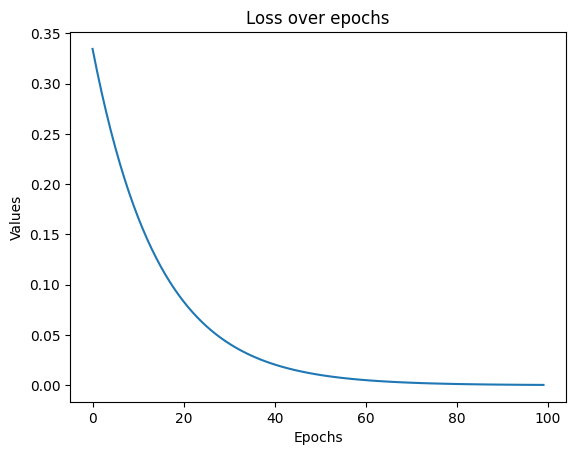

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Values')

In [75]:
W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

In [76]:
def get_prediction():
  pre_hidden = np.dot(x, W[0]) + W[1]
  hidden = 1/(1+np.exp(-pre_hidden))
  pred_out = np.dot(hidden, W[2]) + W[3]

  return pred_out

In [77]:
get_prediction()

array([[-0.0174781]])

Training a neural network is a process of coming up with optimal weights for a
 neural network architecture by repeating the two key steps, forward-propagation and
 backpropagation with a given learning rate.